In [5]:
from konlpy.tag import Komoran

komoran=Komoran()

import pandas as pd
import os
import numpy as np
def MED_POS_tag(x):
    MED=pd.read_csv('/home/u1013/schtm_osy_lsm_kjh/Crawling_Dataset/{0}'.format(x),encoding='utf-8')
    MED=MED.drop('Unnamed: 0',axis=1)
    MED_text=np.array(MED.loc[:,'Text'].tolist())
    MED_pos_words=[]
    for i in range(len(MED)):
        list=[]
        list+=komoran.pos(MED_text[i])
        MED_pos_words.append(list)
    total_text=[]
    pos_text=[]
    keyword=['의료정책']
    for j in range(len(MED)):
        text_list=MED_pos_words[j]
        for i in range(len(text_list)):
            if text_list[i][1] not in ('SF','SP','SS','SE','SO','SW') and text_list[i][0] not in keyword:
                pos_text.append(text_list[i][:])
        total_text.append(pos_text)
        pos_text=[]
    sub_pos=[]
    selected_pos=[]
    for j in range(len(total_text)):
        pos_list=total_text[j]
        for i in range(len(pos_list)):
            if pos_list[i][1] in ('NNG','NNP'):
                sub_pos.append(pos_list[i][0])
        selected_pos.append(sub_pos)
        sub_pos=[]
    for z in range(len(selected_pos)):
        selected_pos[z]=" ".join(selected_pos[z])
    return selected_pos    

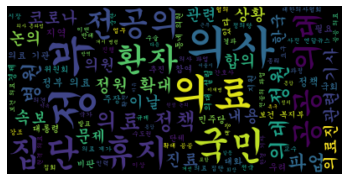

In [4]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = './gungsuh.ttf'

noun_text=''
for i in tag:
    noun_text=noun_text+' '+i
wordcloud=WordCloud(max_font_size=60,relative_scaling=.5,font_path=FONT_PATH).generate(noun_text)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
tag=MED_POS_tag('한국경제TV_의료정책.csv')

In [15]:
import pickle

with open('한국경제TV_의료정책_Noun_doc.txt','wb') as f:
    pickle.dump(tag,f)

In [16]:
with open('한국경제TV_의료정책_Noun_doc.txt','rb') as f:
    read=pickle.load(f)
    print(read)

['한정애 더불어민주당 신임 정책위 의장 오전 국회 원내 대책 회의 발언 사진 연합뉴스 국회 보건 복지 위원장 한정애 더불어민주당 의원 사진 공공 의대 설립 의사 정원 확충 의료 계가 반발 정부 의료 정책 관련 당의 이름 강행 처리 논의 체 협의 안 법제 화해 처리 한정애 의원 이날 KBS 라디오 김경래 최강 시사 인터뷰 의대 정원 방법 말 한정애 의원 이제 주장 논의 토론 때 국회 장 정부 의료 정책 원점 논의 합의문 명문 요구 관련 기사 이낙연 김종인 대권 도전 바람결 있다 히포크라테스 선서 언급 뿔 의료 취임 선서 홍 남 겨냥 박근혜 사람 커밍아웃 인사 홍 남 철 비판 철 노력 이재명 의료진 북한 강제 파견 품격 시무 조 논쟁 여의도 브리핑 이재명 홍 남 인터뷰 확인 비난 당황 의사 국가시험 연기 이인영 난시 의료인 파견 기본 불의 제자 복지부 의대 교수 종합 최고 위원 청년 배려 이낙연 파격 인선 원점 재검토 단어 정부 국회 굴복 의미 정책 진행 때 소통 부족 원점 철회 방식 요구 정부 단어 집착 내용 뜻 의료 현장 상황 포함 논의 진행 협의 국회 이제 현장 당부 전공의 무기 파업 지속 지난달 서울 종로구 서울대병원 본관 앞 전문의 정부 추진 의대 정원 확대 공공 의대 설립 반대 피켓 시위 사진 허 문 찬 기자 .com 의사 국가 고시 연기 정부 상황 이어 국회 제안 국회 협의 기구 모두 공감대 표명 의료 서비스 지역 불균형 해소 필수 의료 강화 공공 의료 확충 의료 계가 제기 문제 의료 협의 틀 보장 보증 이상 약속 생각 그럼에도 불구하고 국회 요구 사항 말씀 주호영 미래 통합 당 원내대표 제안 여야 정 합의체 의료 신종 코로나바이러스 감염증 코로나 19 상황 안정 이후 불안감 9월 정기 국회 협의체 조준 혁 한경 닷 컴 기자 .com', '전공의 전임 의료 계가 의대 정원 확대 공공 의대 설립 정책 철회 촉구 집단 휴지 서울 종로구 서울대병원 본관 앞 전공의 정부 의료 정책 반대 피켓 사진 뉴스1 전공의 집단 휴지 의료 공백 발생 가운데 법무부 산하